In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import pandas as pd

c:\Users\39379\anaconda3\envs\bio_info\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [54]:
data=pd.read_csv('..\Dataset\Dataset_tpm.tsv', sep='\t')
data

,gene_id,8aac9904-a75b-4aa7-8229-2e9a84b5c8ed,2c95a51c-5ac7-4137-93c6-9fdd8ea91b64,cd23df50-032f-4ebc-af00-4a404e528111,b815eec3-1e09-4cb9-9dcc-40924b721328,59d646f1-8088-4ef4-81a0-92965baa0ce3,47e14032-8560-48f6-8011-cddfd2777bc8,a243ebaa-1ce3-4dc9-b805-90ab7f5b7b19,25061bb6-2e72-4d8b-b42d-e42553f71a65,e070fb7d-674e-4863-a65a-a5be0419d67b,...,8b477ce8-817c-4268-b24e-1a09ebaa4939,400dc107-3381-4fa9-81e8-76fce69d853c,50cd452e-09bb-451b-807d-3689116137c7,0f16dd07-0701-417d-8861-c2e6ceff93b7,5e173afc-9eaa-49a3-9803-ced9d1e6617d,06fde02a-86af-4e12-b891-b909b30cccd6,a769ff77-d6a4-4df2-a3e5-f301b28b46f9,b9a0e7ef-e308-4c68-94b1-dbcd04848da3,387a5363-b004-4b50-bcd6-40939af10ce4,7f870732-738c-4037-8fac-102fc0658ea8
0,ENSG00000000003.15,110.8209,18.9716,31.3648,77.0809,97.4659,77.9752,66.2699,42.8210,63.2610,...,28.5261,223.1877,32.3520,45.4256,28.1120,157.3040,105.6927,23.9201,39.4256,48.8916
1,ENSG00000000005.6,0.3692,0.1079,0.1729,0.1232,0.3252,0.0000,0.4752,0.0225,1.0190,...,0.1642,0.6431,0.0000,0.3427,0.1581,0.5047,0.0805,0.0414,0.4013,0.1657
2,ENSG00000000457.14,8.5515,4.2076,6.6757,17.1878,7.6239,9.4100,1.6303,4.3649,2.4927,...,9.5639,6.7132,5.7997,4.9730,5.4057,12.5862,6.9204,4.4824,6.0633,4.3207
3,ENSG00000000460.17,8.9948,3.7517,5.7297,10.8712,4.0197,6.0506,1.8797,1.7165,3.8816,...,3.9032,6.3662,4.7958,6.2419,4.0912,24.3057,14.5038,3.2798,5.3759,4.1785
4,ENSG00000000938.13,3.7538,3.1936,68.5099,1.3438,6.5092,5.0288,2.9033,2.6070,8.3676,...,12.6935,2.4025,7.1417,1.0470,4.3163,1.1123,3.0348,2.8993,10.4769,2.7479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16239,ENSG00000259305.6,0.2661,0.9618,0.3211,0.2058,0.3622,0.4922,0.4235,0.3767,0.8571,...,0.2134,0.3152,0.5235,0.3818,0.1370,0.2811,0.5982,0.3689,0.1626,0.2953
16240,ENSG00000259384.7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0331,0.0000,0.0000,0.0000
16241,ENSG00000259399.1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
16242,ENSG00000259431.6,9.6708,7.0459,2.4404,6.9100,6.3243,14.7180,3.2475,3.0696,3.3090,...,5.2331,1.9942,3.1815,7.0500,2.6789,9.4849,3.7519,5.3304,5.1728,15.1438


In [55]:
# Escludi la prima colonna (ID dei geni) prima di eseguire la PCA
data_without_gene_id = data.iloc[:, 1:]

In [56]:
#trasposto il dataframe per avere le colonne come geni
data_t = data_without_gene_id.T
data_t.head()

,0,1,2,3,4,5,6,7,8,9,...,16234,16235,16236,16237,16238,16239,16240,16241,16242,16243
8aac9904-a75b-4aa7-8229-2e9a84b5c8ed,110.8209,0.3692,8.5515,8.9948,3.7538,20.1232,63.6748,10.0737,8.6184,10.7170,...,0.0758,0.000,1.2277,0.7939,2.0025,0.2661,0.0,0.0,9.6708,0.1830
2c95a51c-5ac7-4137-93c6-9fdd8ea91b64,18.9716,0.1079,4.2076,3.7517,3.1936,5.3740,13.1303,8.1481,1.3402,11.1525,...,0.0232,0.000,0.6100,12.2065,0.3192,0.9618,0.0,0.0,7.0459,0.0000
cd23df50-032f-4ebc-af00-4a404e528111,31.3648,0.1729,6.6757,5.7297,68.5099,9.4900,24.3028,10.8411,3.9991,22.0513,...,0.0155,0.103,0.3703,104.7789,1.2034,0.3211,0.0,0.0,2.4404,0.1943
b815eec3-1e09-4cb9-9dcc-40924b721328,77.0809,0.1232,17.1878,10.8712,1.3438,23.1516,36.3978,6.3707,4.5978,9.6596,...,0.0661,0.000,0.3164,1.5484,0.0268,0.2058,0.0,0.0,6.9100,0.0000
59d646f1-8088-4ef4-81a0-92965baa0ce3,97.4659,0.3252,7.6239,4.0197,6.5092,64.5196,52.3157,10.9269,6.9701,17.9976,...,0.0175,0.000,1.6430,8.8118,0.2451,0.3622,0.0,0.0,6.3243,0.0000


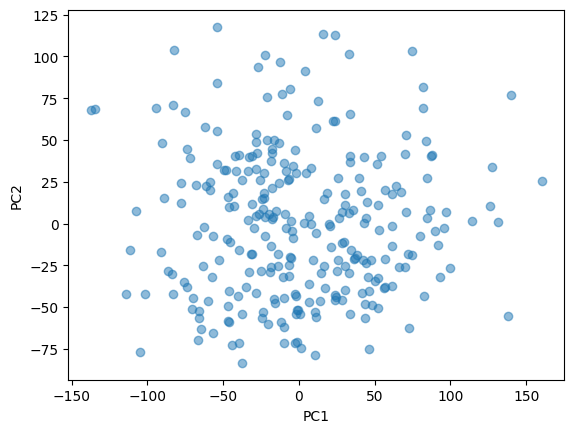

In [57]:

#applica il logaritmo in base 2 aggiungendo un valore piccolo per evitare il logaritmo di 0
data_t = np.log2(data_t + 0.01)

# Standardizzazione dei dati
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_t)
pca = PCA(n_components=2)
pca.fit(data_t)
x_pca = pca.transform(data_t) 
plt.scatter(x_pca[:,0],x_pca[:,1],alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

c:\Users\39379\anaconda3\envs\bio_info\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


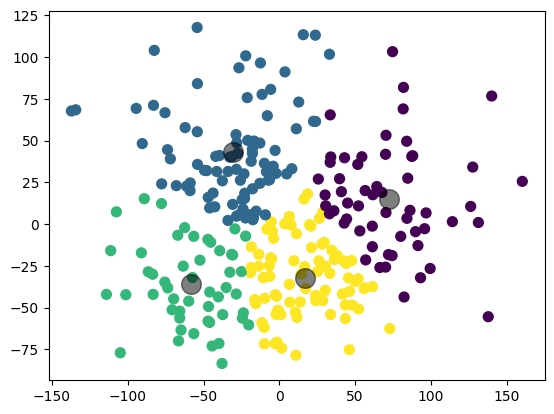

In [58]:
# k-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(x_pca)
y_kmeans = kmeans.predict(x_pca)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

#gruppo a minor varianza
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)



Cluster 0: Varianza = 1514.3083934589513
Cluster 1: Varianza = 1144.272545352417
Cluster 2: Varianza = 1019.880368369067
Il cluster con la minore varianza è il Cluster 2 con varianza = 1019.880368369067


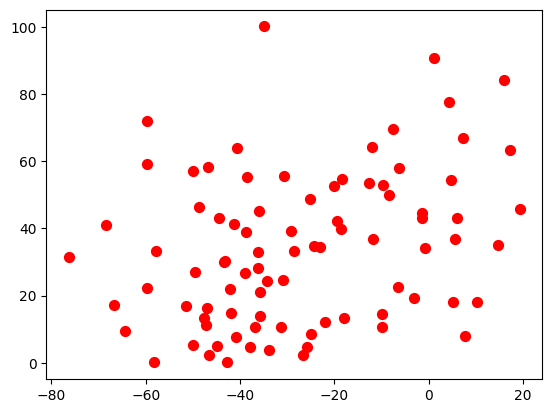

In [57]:
import numpy as np
from sklearn.metrics import pairwise_distances

# x_pca = i tuoi dati PCA
# y_kmeans = etichette dei cluster ottenute da KMeans

# Calcola le distanze di tutti i punti dai rispettivi centroidi
distances = pairwise_distances(x_pca, kmeans.cluster_centers_, metric='euclidean')

# Calcola la varianza per ciascun cluster
variances = []
for i in range(kmeans.n_clusters):
    # Seleziona le distanze dei punti appartenenti al cluster i
    cluster_distances = distances[y_kmeans == i, i]
    
    # Calcola la varianza (media delle distanze quadrate al centroide)
    cluster_variance = np.mean(np.square(cluster_distances))
    variances.append(cluster_variance)

# Stampa la varianza di ciascun cluster
for i, variance in enumerate(variances):
    print(f"Cluster {i}: Varianza = {variance}")

# Identifica il cluster con la minore varianza
min_variance_cluster = np.argmin(variances)
print(f"Il cluster con la minore varianza è il Cluster {min_variance_cluster} con varianza = {variances[min_variance_cluster]}")
#scatter di tutti i cluster con il cluster a minore varianza in rosso
plt.scatter(x_pca[y_kmeans == min_variance_cluster, 0], x_pca[y_kmeans == min_variance_cluster, 1], c='red', s=50, cmap='viridis')


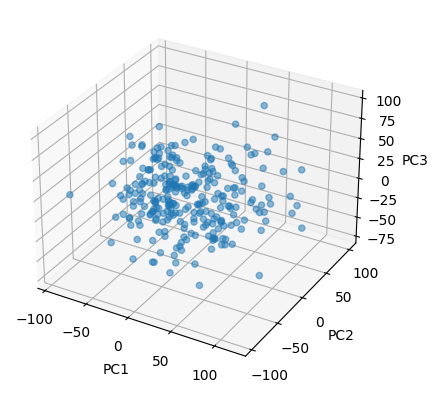

In [41]:
# rifallo in 3D
pca = PCA(n_components=3)
pca.fit(data_t)
x_pca_3d = pca.transform(data_t)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca_3d[:,0],x_pca_3d[:,1],x_pca_3d[:,2],alpha=0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

    

c:\Users\39379\anaconda3\envs\bio_info\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


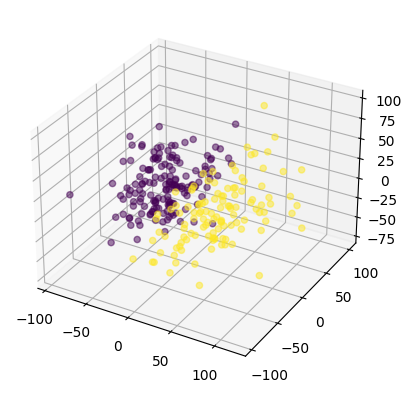

In [46]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_pca_3d)
y_kmeans = kmeans.predict(x_pca_3d)
#plot 3d con i cluster colorati
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca_3d[:,0],x_pca_3d[:,1],x_pca_3d[:,2],c=y_kmeans, cmap='viridis',alpha=0.5)

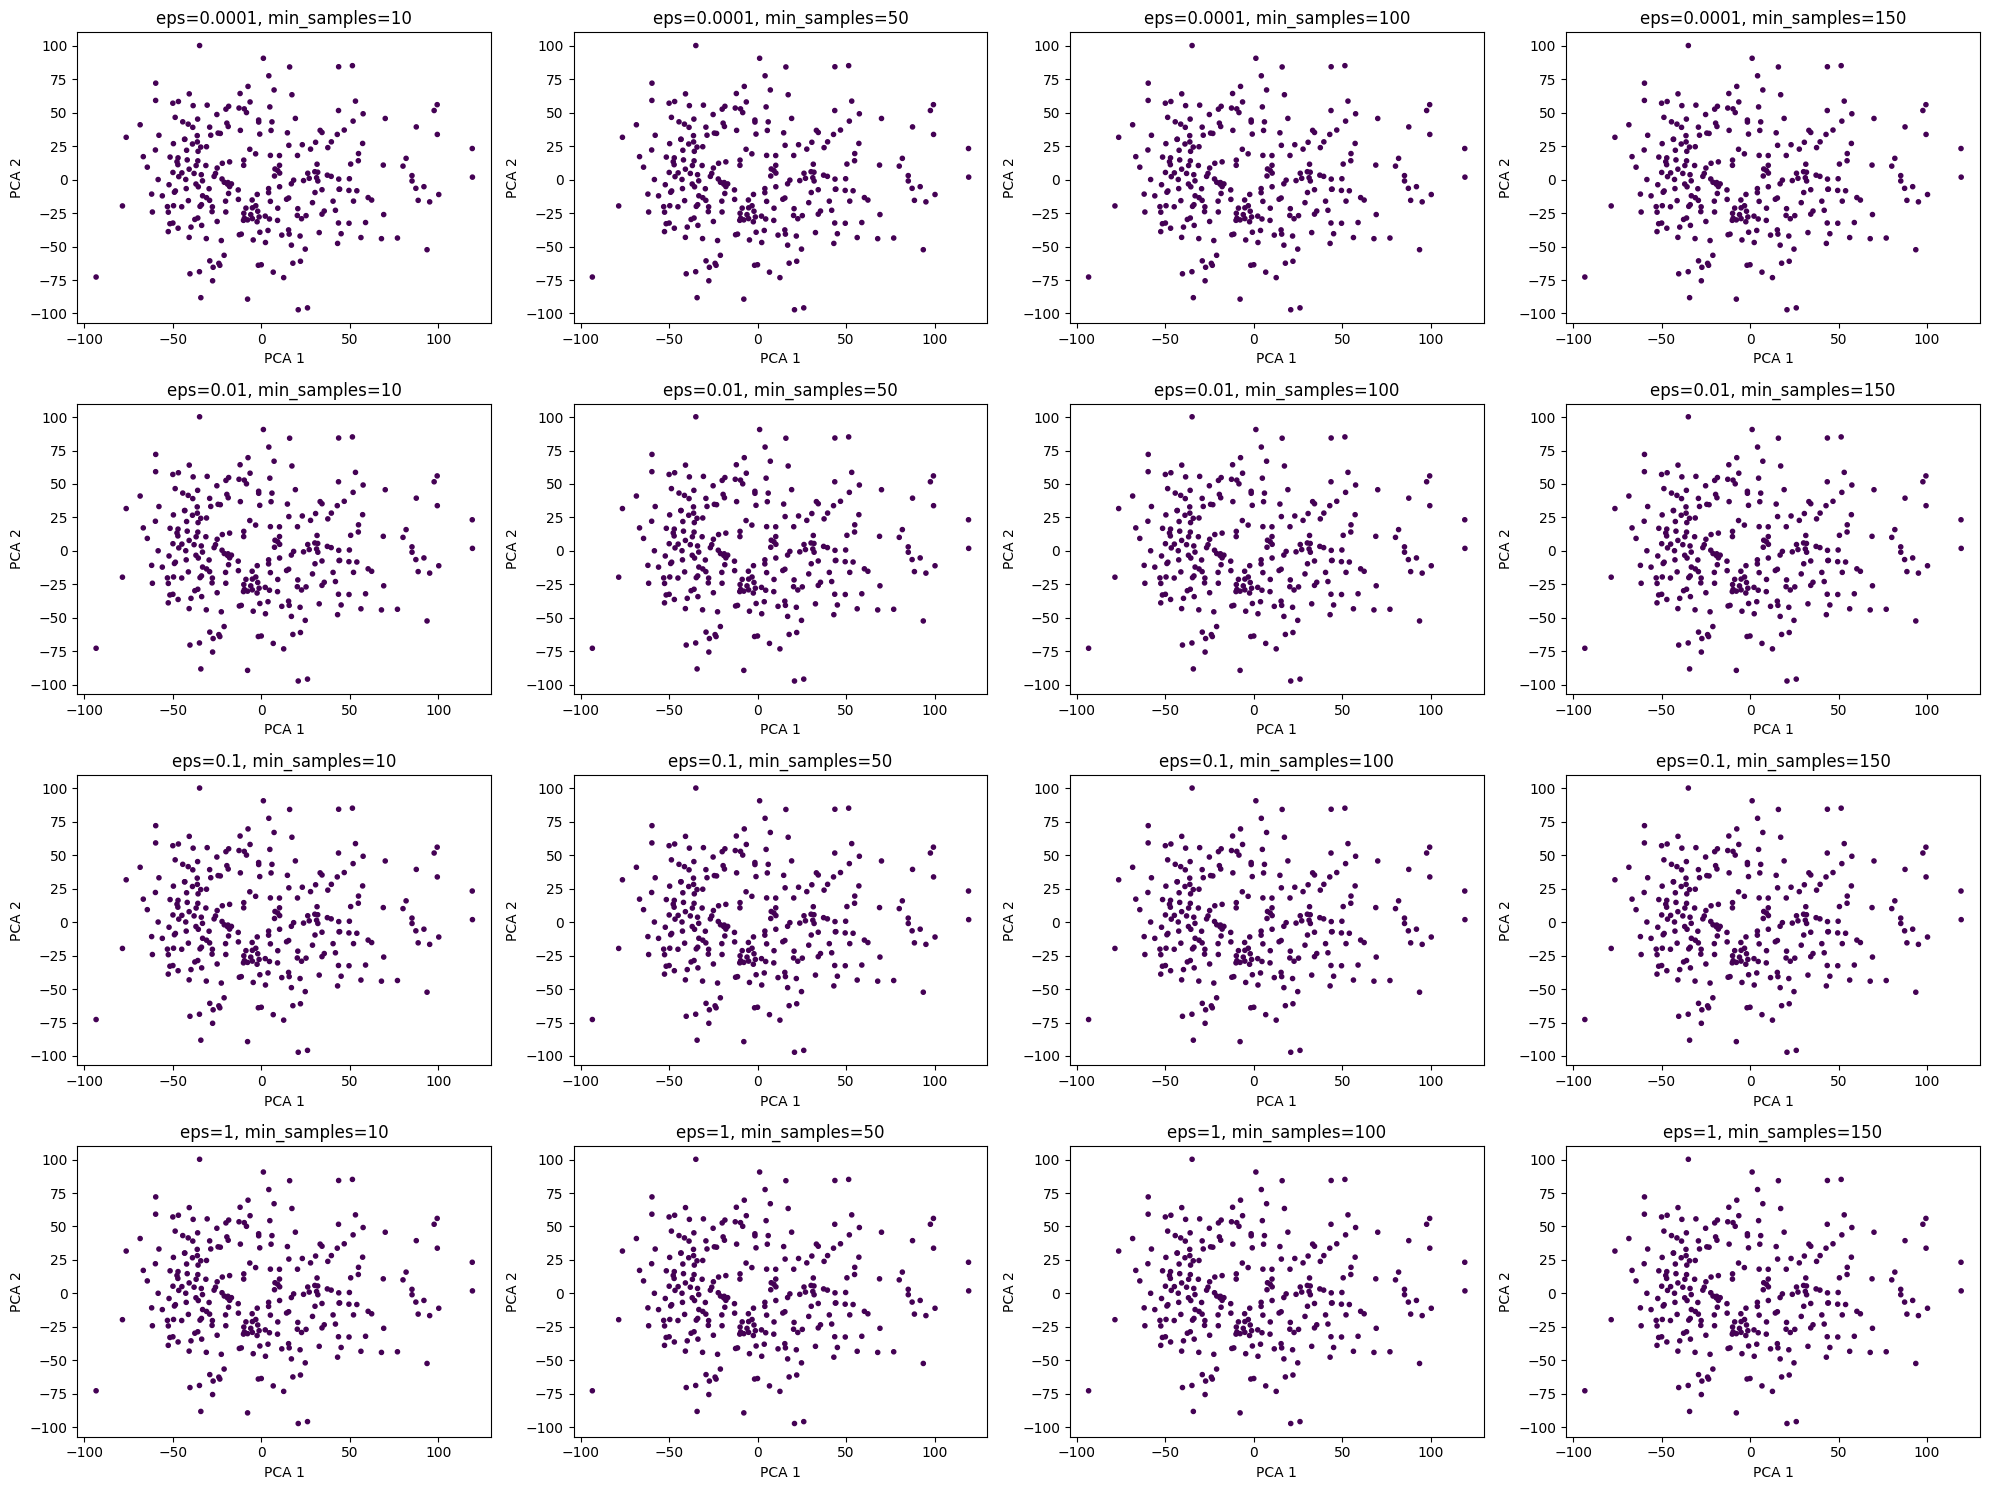

In [45]:
from sklearn.cluster import DBSCAN
from itertools import product
dbscan = DBSCAN(eps=0.5, min_samples=10)
# dbscan.fit(x_pca)
# label = dbscan.fit_predict(x_pca)
# plt.scatter(x_pca[:, 0], x_pca[:, 1], c=label, cmap='viridis')

eps_values = [0.0001, 0.01, 0.1, 1]
min_samples_values = [10, 50, 100, 150]

# Crea una figura per i plot
fig, axs = plt.subplots(len(eps_values), len(min_samples_values), figsize=(20, 15))

# Itera attraverso tutte le combinazioni di eps e min_samples
for i, (eps, min_samples) in enumerate(product(eps_values, min_samples_values)):
    # Crea e adatta il modello DBSCAN con i parametri correnti
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(x_pca)
    
    # Ottieni le etichette del cluster
    labels = dbscan.labels_
    
    # Trova l'indice per il subplot corrente
    row = i // len(min_samples_values)
    col = i % len(min_samples_values)
    
    # Visualizza lo scatter plot per la combinazione corrente di parametri
    ax = axs[row, col]
    ax.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='viridis', marker='.')
    ax.set_title(f'eps={eps}, min_samples={min_samples}')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')

# Ajusta il layout e mostra il plot
plt.tight_layout()
plt.show()

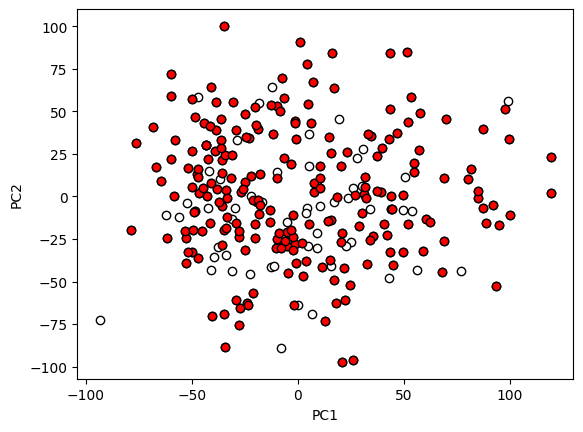

In [92]:

from scipy import stats

# Esecuzione della PCA
pca = PCA()
pca.fit(scaled_data)
# Identificazione degli outlier nello spazio delle componenti principali
z_scores = stats.zscore(pca.transform(scaled_data))
outliers = (np.abs(z_scores) > 3).any(axis=1)

# Visualizzazione degli outlier
fig, ax = plt.subplots()
ax.scatter(x_pca[:, 0], x_pca[:, 1], c='white', edgecolors='black')
ax.scatter(x_pca[outliers, 0], x_pca[outliers, 1], c='red', edgecolors='black')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()


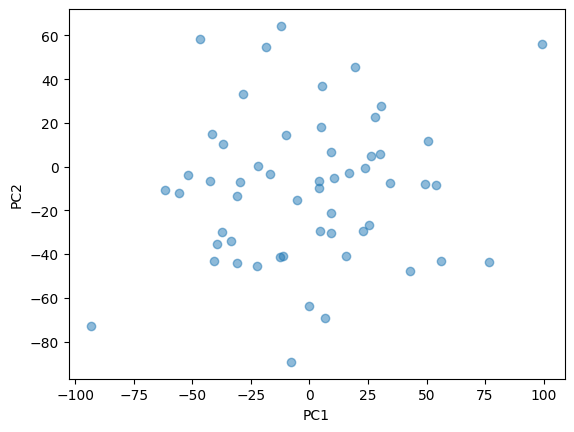

In [100]:
#rimuovi gli outlier e riplotta
x_pca_no_outliers = x_pca[~outliers]
plt.scatter(x_pca_no_outliers[:,0],x_pca_no_outliers[:,1],alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


# analisi outlier dati di metilazione

In [27]:
data  = pd.read_csv('..\Dataset\methylation_filtered.csv', index_col=0)


data 


,6264e699-d40b-4ebc-b443-0a0edcb220dc,ba68f2cf-9271-41fd-9655-1fac7681f588,d0673efd-3315-4dd5-8ab6-912bfa07dceb,40635bf3-d8ba-4833-b623-547e55e5d07e,09c77947-a333-4392-b18d-a6c1f08764a1,bbad2efe-e9c7-4f8f-924b-ebbbe4c181d4,d77ef9cf-f8e6-4ee9-8d4f-1106885f6b06,fe0e3851-d8cb-4533-9536-b4826cd25f87,df53c3c0-3605-4d2b-bdc7-96d9beab27ea,bc2591b0-65d7-48c3-a5cc-783f67b65869,...,4c18d9cf-4af4-4a86-8b1c-f78795fbbd7e,9af2248a-d86a-4277-93b4-8eba5a39bd3c,02594e5e-8751-47c1-9245-90c66984b665,872d2922-7292-4681-adb7-d3b267eccbe7,c183d3fb-2eee-44f8-890e-b9bf907141e6,5d36676e-4140-44b5-aa0e-b2af092b7dc0,b6b607cd-67b8-4c04-a212-a4e8c0743f05,0d5e232d-5aa2-4f6f-be58-ffd5f15ee0b8,b4225c44-b9b6-46c5-aabf-7b0d9a9fe20b,a5030259-cf9c-4a58-8710-b9da8ee59320
cg_id,,,,,,,,,,,,,,,,,,,,,
cg00000292,0.605340,0.058162,0.877318,0.940889,0.810086,0.916845,0.779235,0.773485,0.933854,0.919749,...,0.873594,0.775427,0.900892,0.397515,0.534723,0.908606,0.797751,0.949653,0.950152,0.954801
cg00002426,0.047838,0.016493,0.041167,0.922633,0.103832,0.685613,0.219663,0.149864,0.139051,0.105827,...,0.035281,0.800353,0.616587,0.036478,0.042228,0.022875,0.295798,0.018958,0.957308,0.115651
cg00003994,0.029691,0.247573,0.031503,0.037621,0.022757,0.012381,0.011538,0.012964,0.218298,0.029063,...,0.020271,0.075042,0.019306,0.016976,0.365977,0.015142,0.018152,0.458334,0.039994,0.064219
cg00005847,0.842209,0.282497,0.683714,0.903991,0.812266,0.860653,0.417115,0.751381,0.620082,0.624374,...,0.793169,0.881865,0.790049,0.882217,0.910726,0.517588,0.381840,0.911336,0.468563,0.876845
cg00006414,0.030500,0.021845,0.034040,0.031495,0.028558,0.034952,0.035809,0.028738,0.045980,0.036336,...,0.026173,0.039547,0.028511,0.027192,0.031255,0.027094,0.041994,0.019404,0.038303,0.090805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg27657283,0.035668,0.013302,0.028474,0.025142,0.022941,0.026853,0.009041,0.017217,0.022743,0.015098,...,0.015633,0.021377,0.018945,0.014884,0.020162,0.016568,0.020444,0.014127,0.029938,0.080898
cg27661264,0.154812,0.028799,0.408730,0.319114,0.281500,0.235815,0.321539,0.155187,0.162235,0.335970,...,0.086428,0.369042,0.286567,0.057520,0.834345,0.393279,0.072380,0.065361,0.653332,0.108482
cg27662379,0.008344,0.009053,0.014777,0.007936,0.009339,0.021392,0.012413,0.007944,0.011704,0.014453,...,0.012038,0.026748,0.010153,0.008892,0.011082,0.011172,0.008704,0.006621,0.012631,0.025501


In [28]:
data.dropna(inplace=True)
data

,6264e699-d40b-4ebc-b443-0a0edcb220dc,ba68f2cf-9271-41fd-9655-1fac7681f588,d0673efd-3315-4dd5-8ab6-912bfa07dceb,40635bf3-d8ba-4833-b623-547e55e5d07e,09c77947-a333-4392-b18d-a6c1f08764a1,bbad2efe-e9c7-4f8f-924b-ebbbe4c181d4,d77ef9cf-f8e6-4ee9-8d4f-1106885f6b06,fe0e3851-d8cb-4533-9536-b4826cd25f87,df53c3c0-3605-4d2b-bdc7-96d9beab27ea,bc2591b0-65d7-48c3-a5cc-783f67b65869,...,4c18d9cf-4af4-4a86-8b1c-f78795fbbd7e,9af2248a-d86a-4277-93b4-8eba5a39bd3c,02594e5e-8751-47c1-9245-90c66984b665,872d2922-7292-4681-adb7-d3b267eccbe7,c183d3fb-2eee-44f8-890e-b9bf907141e6,5d36676e-4140-44b5-aa0e-b2af092b7dc0,b6b607cd-67b8-4c04-a212-a4e8c0743f05,0d5e232d-5aa2-4f6f-be58-ffd5f15ee0b8,b4225c44-b9b6-46c5-aabf-7b0d9a9fe20b,a5030259-cf9c-4a58-8710-b9da8ee59320
cg_id,,,,,,,,,,,,,,,,,,,,,
cg00003994,0.029691,0.247573,0.031503,0.037621,0.022757,0.012381,0.011538,0.012964,0.218298,0.029063,...,0.020271,0.075042,0.019306,0.016976,0.365977,0.015142,0.018152,0.458334,0.039994,0.064219
cg00005847,0.842209,0.282497,0.683714,0.903991,0.812266,0.860653,0.417115,0.751381,0.620082,0.624374,...,0.793169,0.881865,0.790049,0.882217,0.910726,0.517588,0.381840,0.911336,0.468563,0.876845
cg00006414,0.030500,0.021845,0.034040,0.031495,0.028558,0.034952,0.035809,0.028738,0.045980,0.036336,...,0.026173,0.039547,0.028511,0.027192,0.031255,0.027094,0.041994,0.019404,0.038303,0.090805
cg00007981,0.015019,0.010647,0.013409,0.011366,0.016956,0.025126,0.010337,0.010572,0.013297,0.015446,...,0.012930,0.023146,0.016226,0.011689,0.016117,0.010386,0.011332,0.009945,0.020891,0.018369
cg00008493,0.897510,0.988061,0.901947,0.981684,0.982356,0.987163,0.758343,0.982593,0.987791,0.985109,...,0.991646,0.979850,0.989972,0.990120,0.992001,0.989901,0.990670,0.991357,0.987449,0.978730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg27657283,0.035668,0.013302,0.028474,0.025142,0.022941,0.026853,0.009041,0.017217,0.022743,0.015098,...,0.015633,0.021377,0.018945,0.014884,0.020162,0.016568,0.020444,0.014127,0.029938,0.080898
cg27661264,0.154812,0.028799,0.408730,0.319114,0.281500,0.235815,0.321539,0.155187,0.162235,0.335970,...,0.086428,0.369042,0.286567,0.057520,0.834345,0.393279,0.072380,0.065361,0.653332,0.108482
cg27662379,0.008344,0.009053,0.014777,0.007936,0.009339,0.021392,0.012413,0.007944,0.011704,0.014453,...,0.012038,0.026748,0.010153,0.008892,0.011082,0.011172,0.008704,0.006621,0.012631,0.025501


In [29]:
data_t = data.T
data_t.head()


cg_id,cg00003994,cg00005847,cg00006414,cg00007981,cg00008493,cg00008713,cg00009407,cg00012199,cg00012386,cg00012792,...,cg27650434,cg27651218,cg27652350,cg27654142,cg27655905,cg27657283,cg27661264,cg27662379,cg27662877,cg27665659
6264e699-d40b-4ebc-b443-0a0edcb220dc,0.029691,0.842209,0.030500,0.015019,0.897510,0.023766,0.012555,0.013205,0.015363,0.019706,...,0.017687,0.783923,0.922479,0.014866,0.030063,0.035668,0.154812,0.008344,0.021433,0.014670
ba68f2cf-9271-41fd-9655-1fac7681f588,0.247573,0.282497,0.021845,0.010647,0.988061,0.010621,0.009152,0.010811,0.007772,0.011323,...,0.009870,0.943536,0.910783,0.013983,0.028437,0.013302,0.028799,0.009053,0.021210,0.018122
d0673efd-3315-4dd5-8ab6-912bfa07dceb,0.031503,0.683714,0.034040,0.013409,0.901947,0.009276,0.041322,0.016455,0.009433,0.019257,...,0.014450,0.845366,0.955473,0.016106,0.046247,0.028474,0.408730,0.014777,0.035486,0.013701
40635bf3-d8ba-4833-b623-547e55e5d07e,0.037621,0.903991,0.031495,0.011366,0.981684,0.011221,0.013363,0.016230,0.012653,0.033819,...,0.009830,0.969570,0.968222,0.012357,0.028156,0.025142,0.319114,0.007936,0.028150,0.011765
09c77947-a333-4392-b18d-a6c1f08764a1,0.022757,0.812266,0.028558,0.016956,0.982356,0.010654,0.008077,0.011467,0.015317,0.008395,...,0.015332,0.957218,0.844431,0.022866,0.024073,0.022941,0.281500,0.009339,0.023038,0.015283


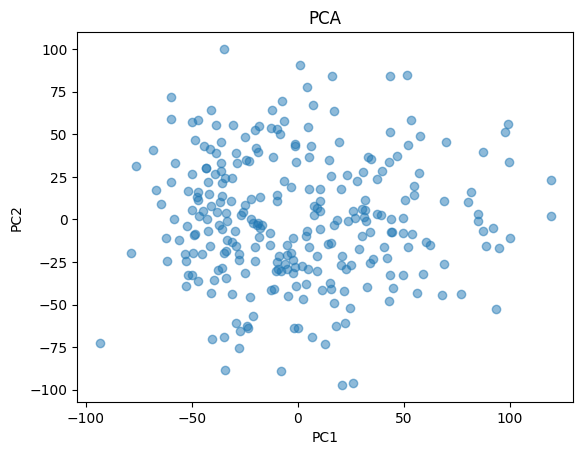

In [48]:
# Standardizzazione dei dati
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_t)
pca = PCA(n_components=2)
pca.fit(data_t)
x_pca = pca.transform(data_t) 
plt.scatter(x_pca[:,0],x_pca[:,1],alpha=0.5)
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

c:\Users\39379\anaconda3\envs\bio_info\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


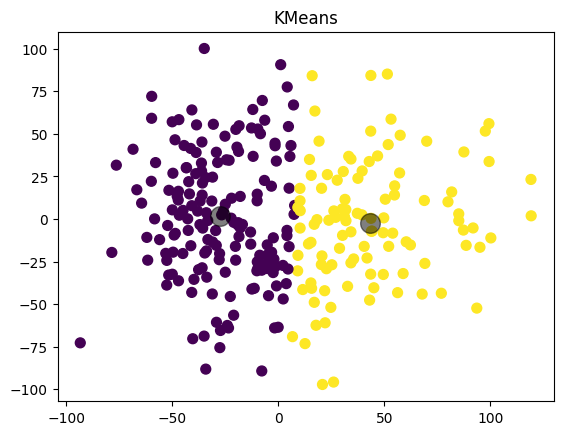

In [49]:
# k-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_pca)
y_kmeans = kmeans.predict(x_pca)
plt.title('KMeans')
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
#gruppo a minor varianza 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)